In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Questão 1** O arquivo ```sinc(x).png``` apresenta o gráfico da função $f(x) = \dfrac{\sin(\pi x)}{(\pi x)}$.
Desenvolva o código usando apenas numpy que gera uma imagem $300\times 300$ que implementa a função ```sinc(x,y)``` em 2D e cujos valores são escalonados para a faixa ```uint8```, ie., $[0,255]$ como apresentado no arquivo ```sinc(x)-2d.png```.

**Questão 2** Desenvolva um código que aprimore a visualização da imagem ```sheep.png```

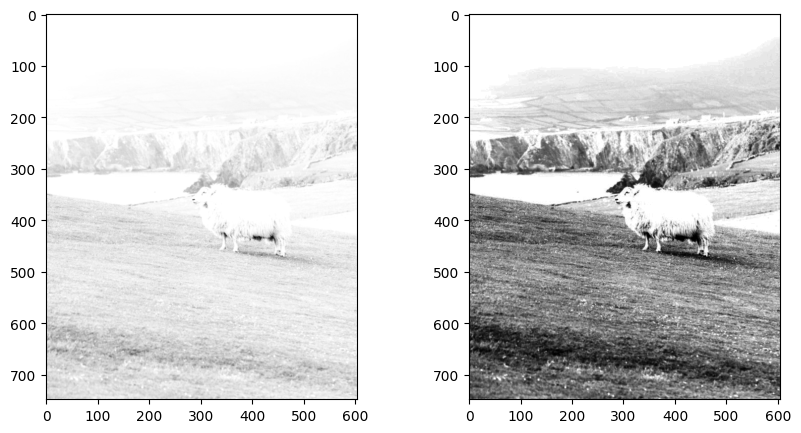

In [43]:
src = cv2.imread('prova/img/sheep.png', cv2.IMREAD_GRAYSCALE)

def melhora_visualizacao(src):
    gamma = 0.12
    gamma = gamma if gamma > 0 else 0.1
    invGamma = 1.0 / gamma
 
    table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(src, table)

dst = melhora_visualizacao(src)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(src, cmap='gray')
plt.subplot(122), plt.imshow(dst, cmap='gray')
plt.show()

**Questão 4** Cada uma das 20 imagens da lua presentes na pasta ```.noises/``` foi corrompida por um ruído aditivo Gaussiano de média nula e um certo desvio padrão. Desenvolva um código que visa remover esse ruído para que o resultado se assemelhe à imagem ```.noises/result.png```.

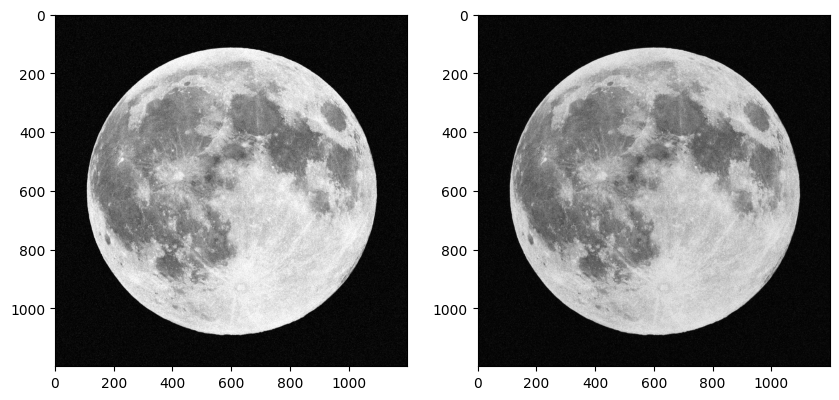

In [42]:
src = cv2.imread('prova/noises/f_noisy_19.png', cv2.IMREAD_GRAYSCALE)

image_fourier = np.fft.fft2(src)

#image_fourier = cv2.dft(np.float32(src),flags = cv2.DFT_COMPLEX_OUTPUT)

image_fourier_shift = np.fft.fftshift(image_fourier)

rows, cols = src.shape

cutoff_frequency = 250

mask = np.zeros((rows, cols), np.uint8)
center_row, center_col = rows // 2, cols // 2
mask[center_row - cutoff_frequency:center_row + cutoff_frequency,
     center_col - cutoff_frequency:center_col + cutoff_frequency] = 1

f_transform_shifted_filtered = image_fourier_shift * mask

f_transform_filtered = np.fft.ifftshift(f_transform_shifted_filtered)

image_filtered = np.abs(np.fft.ifft2(f_transform_filtered))


cv2.imwrite("lua.png", image_filtered)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(src, cmap='gray')
plt.subplot(122), plt.imshow(image_filtered, cmap='gray')
plt.show()

**Questão 5** Deseja-se eliminar o _background_ da imagem ```chips.png``` para que sejam segmentados somente os objetos, i.e., os _chips_. Desenvolva o código que imlementa essa funcionalidade para que seja obtido um resultado semelhante à imagem ```chips-only.png```.

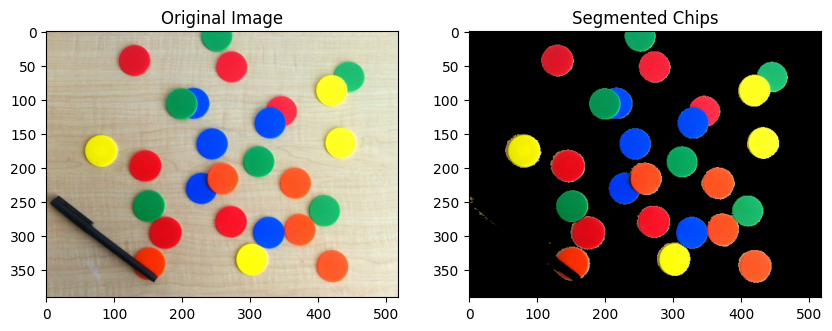

In [68]:
def segment_color(img, color):

    color_ranges = {
        'back': (np.array([0, 100, 100]), np.array([200, 255, 255])),
    }

    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    lower_bound, upper_bound = color_ranges['back']

    mask = cv2.inRange(hsv_img, lower_bound, upper_bound)

    segmented_chips = cv2.bitwise_and(img, img, mask=mask)

    return segmented_chips, mask

input_image = cv2.imread('prova/img/chips.png')

target_color = 'back'

segmented_chips, mask = segment_color(input_image, target_color)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(segmented_chips, cv2.COLOR_BGR2RGB))
plt.title('Segmented Chips')
plt.show()